# <center >**EE3058E: Essentials of AI and Machine Learning**</center>
## <center> Course Project (2024-2025)</center>

#### Submitted by :
    
Name : **Balaji R**
    <br>
 Roll No : **B230865EE**
    <br>
Batch : **EE01**
    <br>
 Department : **Electrical & Electronics engineering**

#### Submitted To :
 Course Faculty : **Dr.Shihabudheen K V (EED)**
***
# **Diabetes Prediction using Machine Learning**

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
***
## Objective
I will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?
***
## Details about the dataset:

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1)

**Number of Observation Units**: 2000

**Variable Number**: 9

**✅ Result** The model created as a result of XGBoost hyperparameter optimization became the model with the Highest Cross Validation Score value. (0.979)
***

# 1) Exploratory Data Analysis

In [454]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore") 

In [455]:
#loading the dataset
df = pd.read_csv("diabetes (1).csv")

In [456]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [457]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [458]:
df.shape

(2000, 9)

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [460]:
# Descriptive statistics of the data 
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,0.000,1.000,3.000,6.000,9.0000,10.000,13.00000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,85.000,99.000,117.000,141.000,168.0000,181.000,195.00000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,54.000,63.500,72.000,80.000,88.0000,90.000,106.00000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,0.000,23.000,32.000,40.0000,44.050,52.00000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,0.000,40.000,130.000,210.0000,293.000,495.00000,744.00
BMI,2000.0,32.19300,8.149901,0.000,23.700,27.375,32.300,36.800,42.1000,45.010,52.90000,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.164,0.244,0.376,0.624,0.8782,1.136,1.60098,2.42
Age,2000.0,33.09050,11.786423,21.000,22.000,24.000,29.000,40.000,50.0000,58.000,67.00000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,0.000,1.000,1.0000,1.000,1.00000,1.00


In [461]:
df["Outcome"].value_counts()*100/len(df)

Outcome
0    65.8
1    34.2
Name: count, dtype: float64

In [462]:
df.Outcome.value_counts()

Outcome
0    1316
1     684
Name: count, dtype: int64

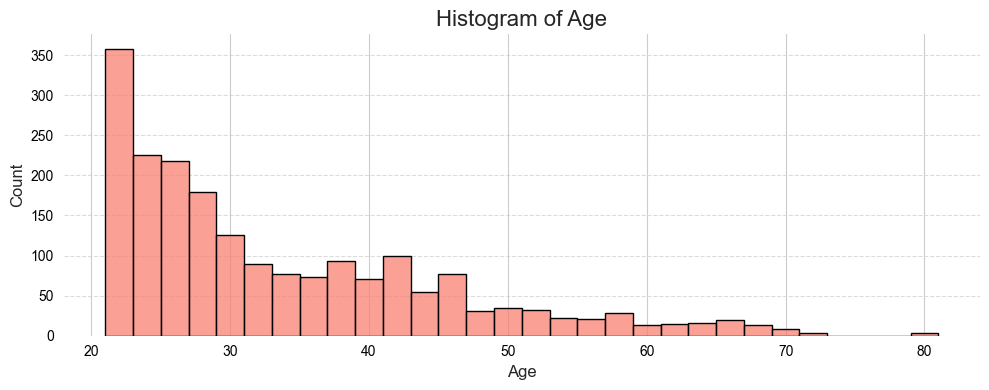

In [463]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="Age", bins=30, color="salmon", edgecolor="black")
plt.title("Histogram of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(color='black')
plt.yticks(color='black')
sns.despine(left=True, bottom=True)  
plt.tight_layout()
plt.show()

<Axes: xlabel='BloodPressure', ylabel='Insulin'>

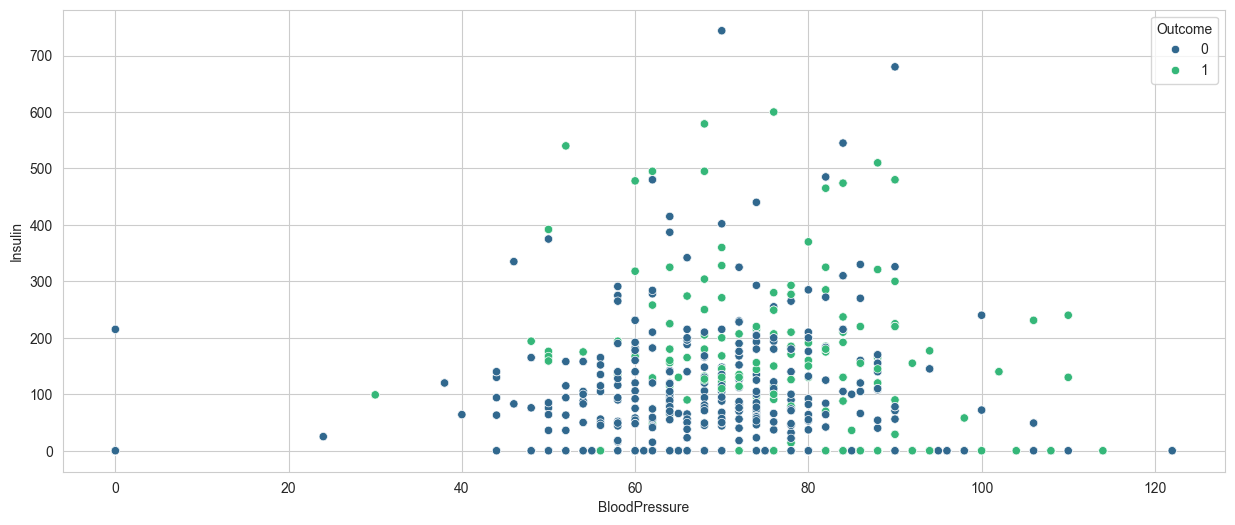

In [464]:
fig, ax = plt.subplots(1,1, figsize=(15,6))
sns.scatterplot(data=df,x="BloodPressure",y='Insulin',hue='Outcome',palette='viridis')

<Axes: xlabel='BMI', ylabel='Count'>

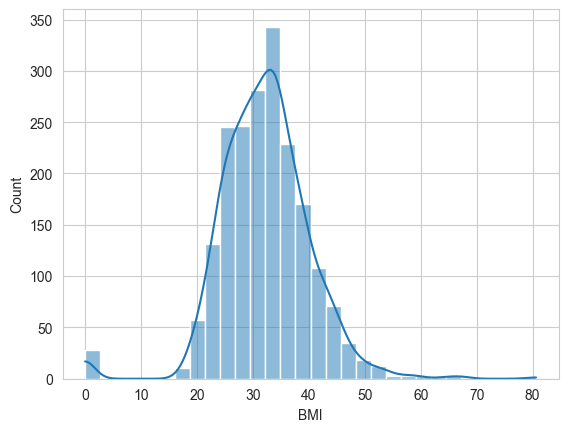

In [465]:
# Histogram of the BMI
sns.histplot(df.BMI, bins = 30,kde=True) 

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

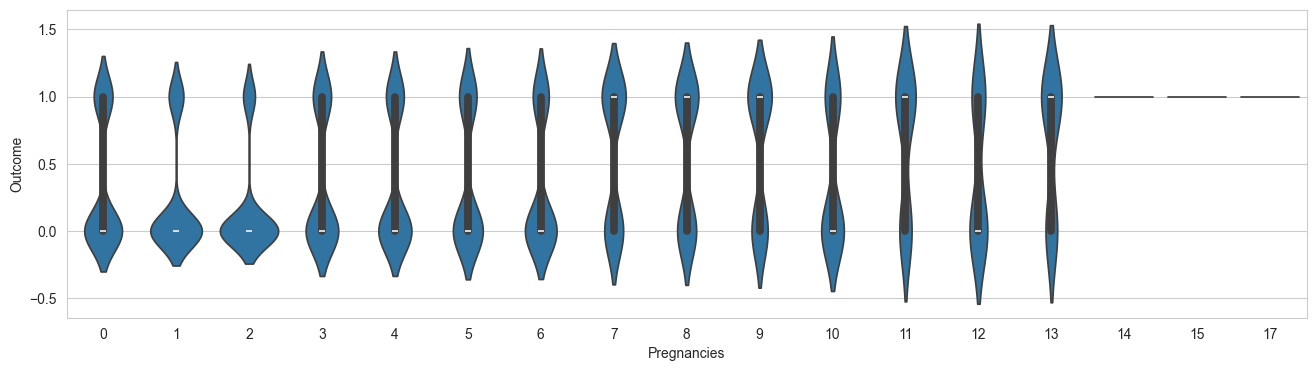

In [466]:
fig, ax = plt.subplots(1,1, figsize=(16,4))
sns.violinplot(data=df,x='Pregnancies',y='Outcome')

In [467]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 81 Min Age: 21


<Axes: xlabel='BMI', ylabel='Density'>

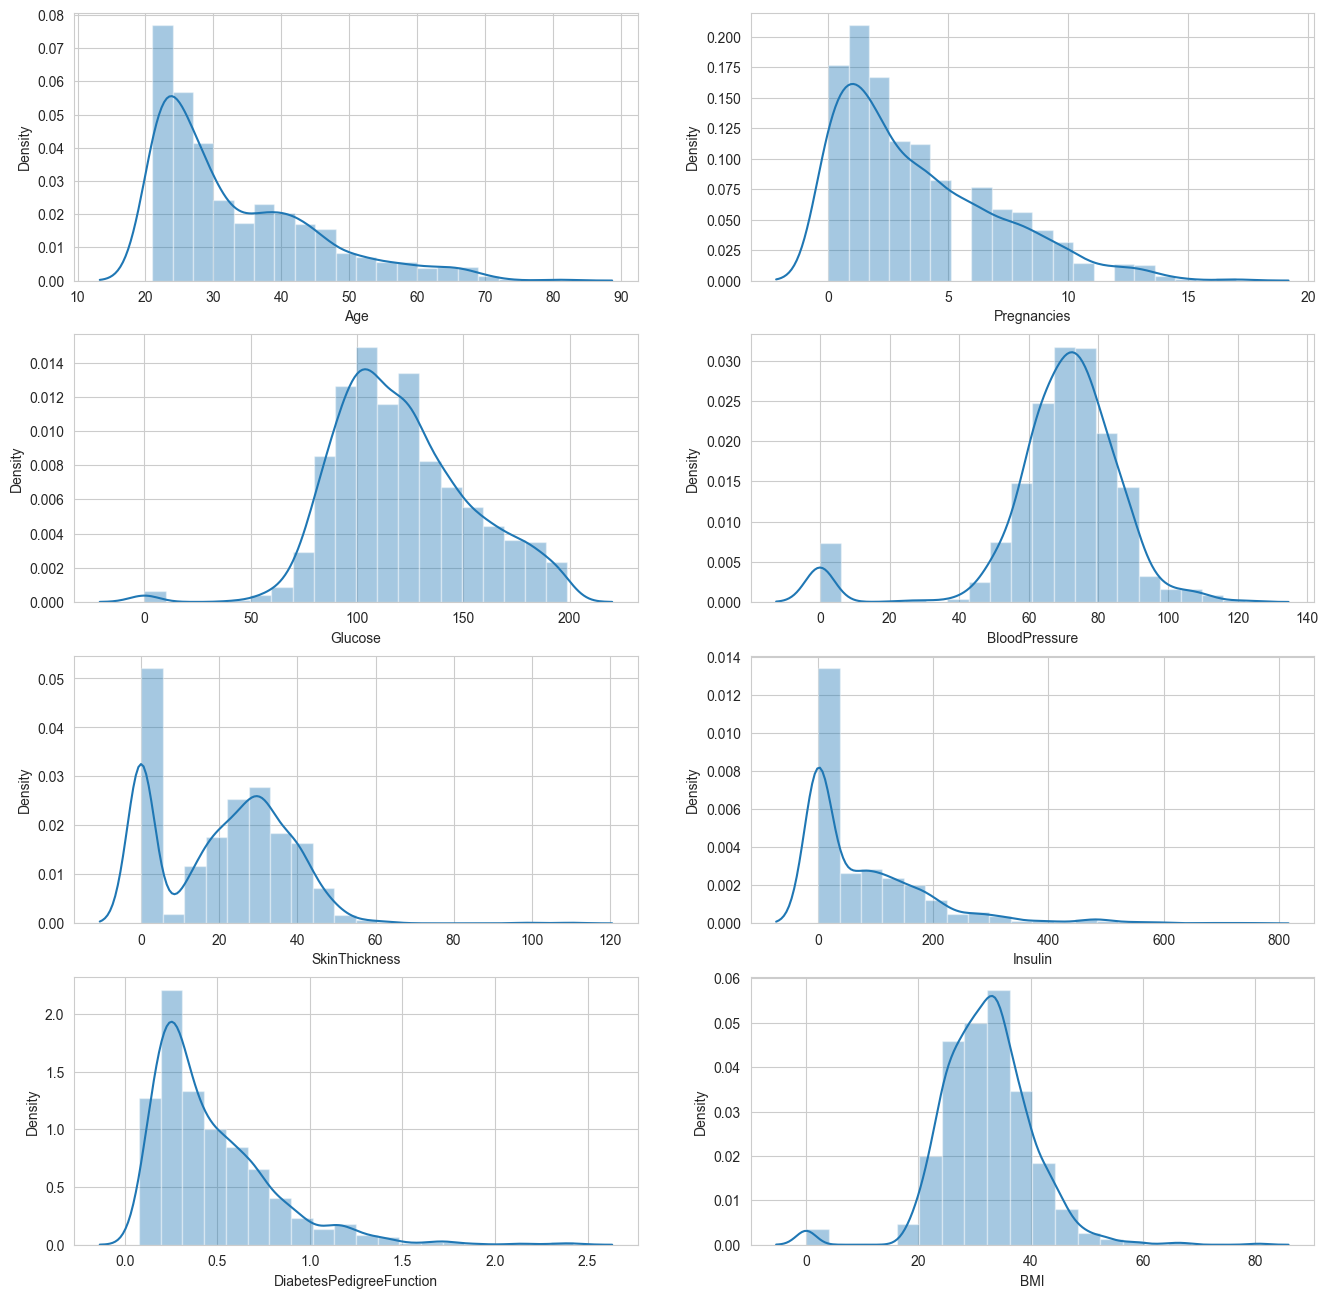

In [468]:
# Histogram and density graphs of all features
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

In [469]:
df.groupby("Outcome").agg({
    "Pregnancies": ["max", "min", "mean"],
    "Insulin": ["max", "min", "mean"],
    "Age": ["max", "min", "mean"],
"Glucose": ["max","min","mean"],
    "BMI": ["max","min","mean"]
    
}).transpose()

Outcome                    0           1
Pregnancies max    13.000000   17.000000
            min     0.000000    0.000000
            mean    3.168693    4.732456
Insulin     max   744.000000  600.000000
            min     0.000000    0.000000
            mean   70.563830   98.897661
Age         max    81.000000   70.000000
            min    21.000000   21.000000
            mean   31.081307   36.956140
Glucose     max   197.000000  199.000000
            min     0.000000    0.000000
            mean  110.586626  141.568713
BMI         max    80.600000   67.100000
            min     0.000000    0.000000
            mean   30.567477   35.320468

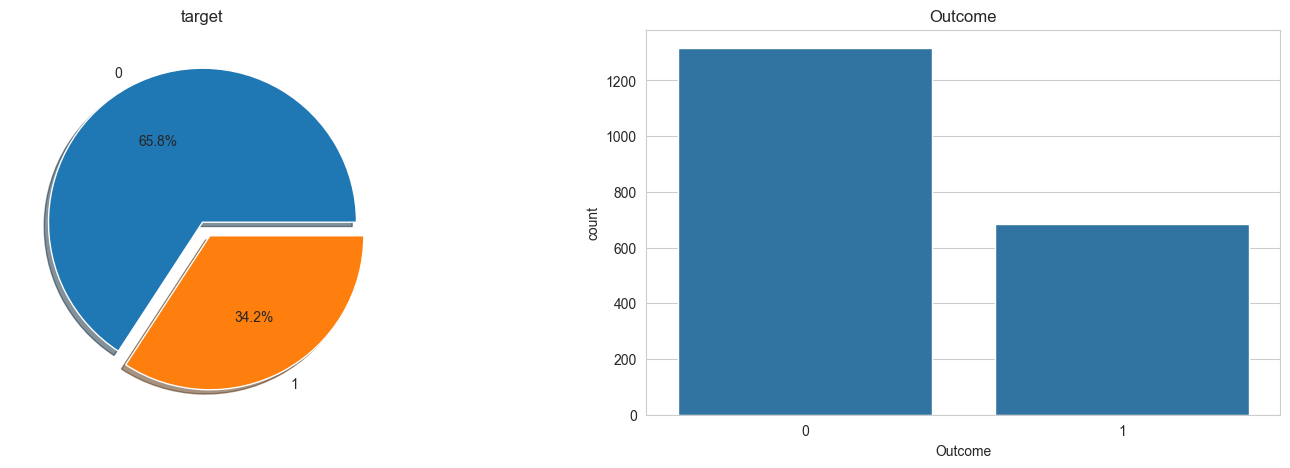

In [470]:
# The distribution of the outcome variable.
f,ax=plt.subplots(1,2,figsize=(18,5))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x='Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [471]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


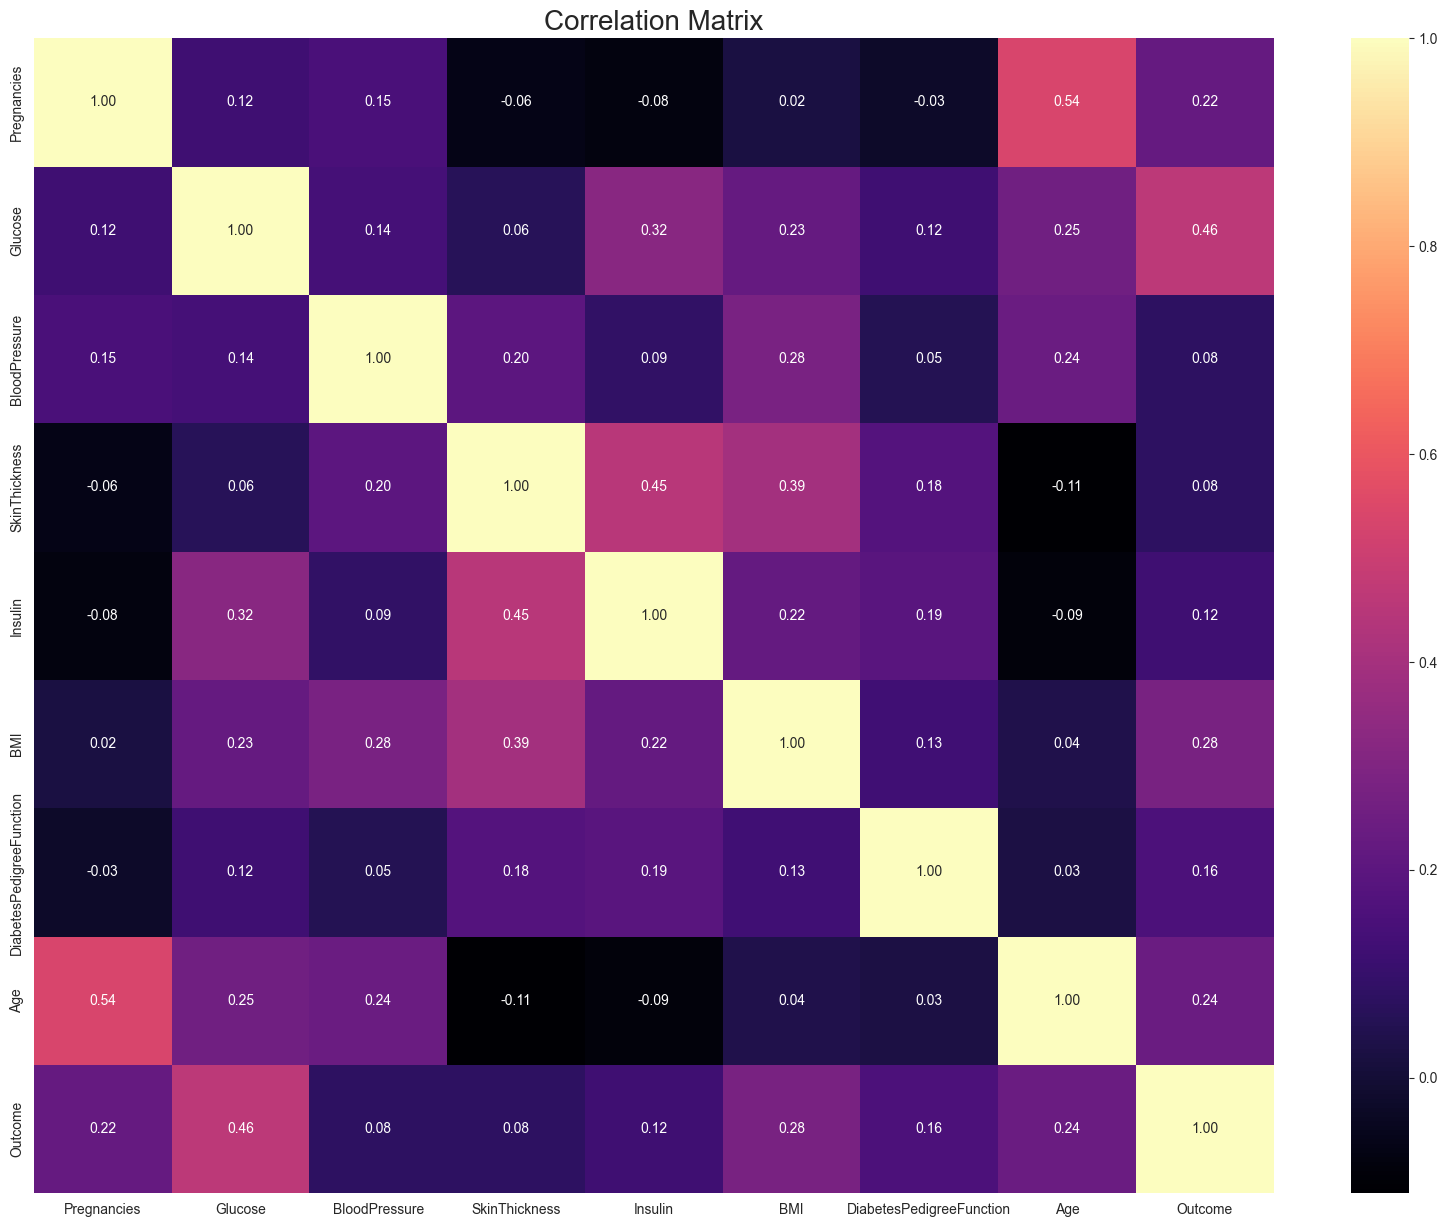

In [472]:
# Correlation matrix 
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

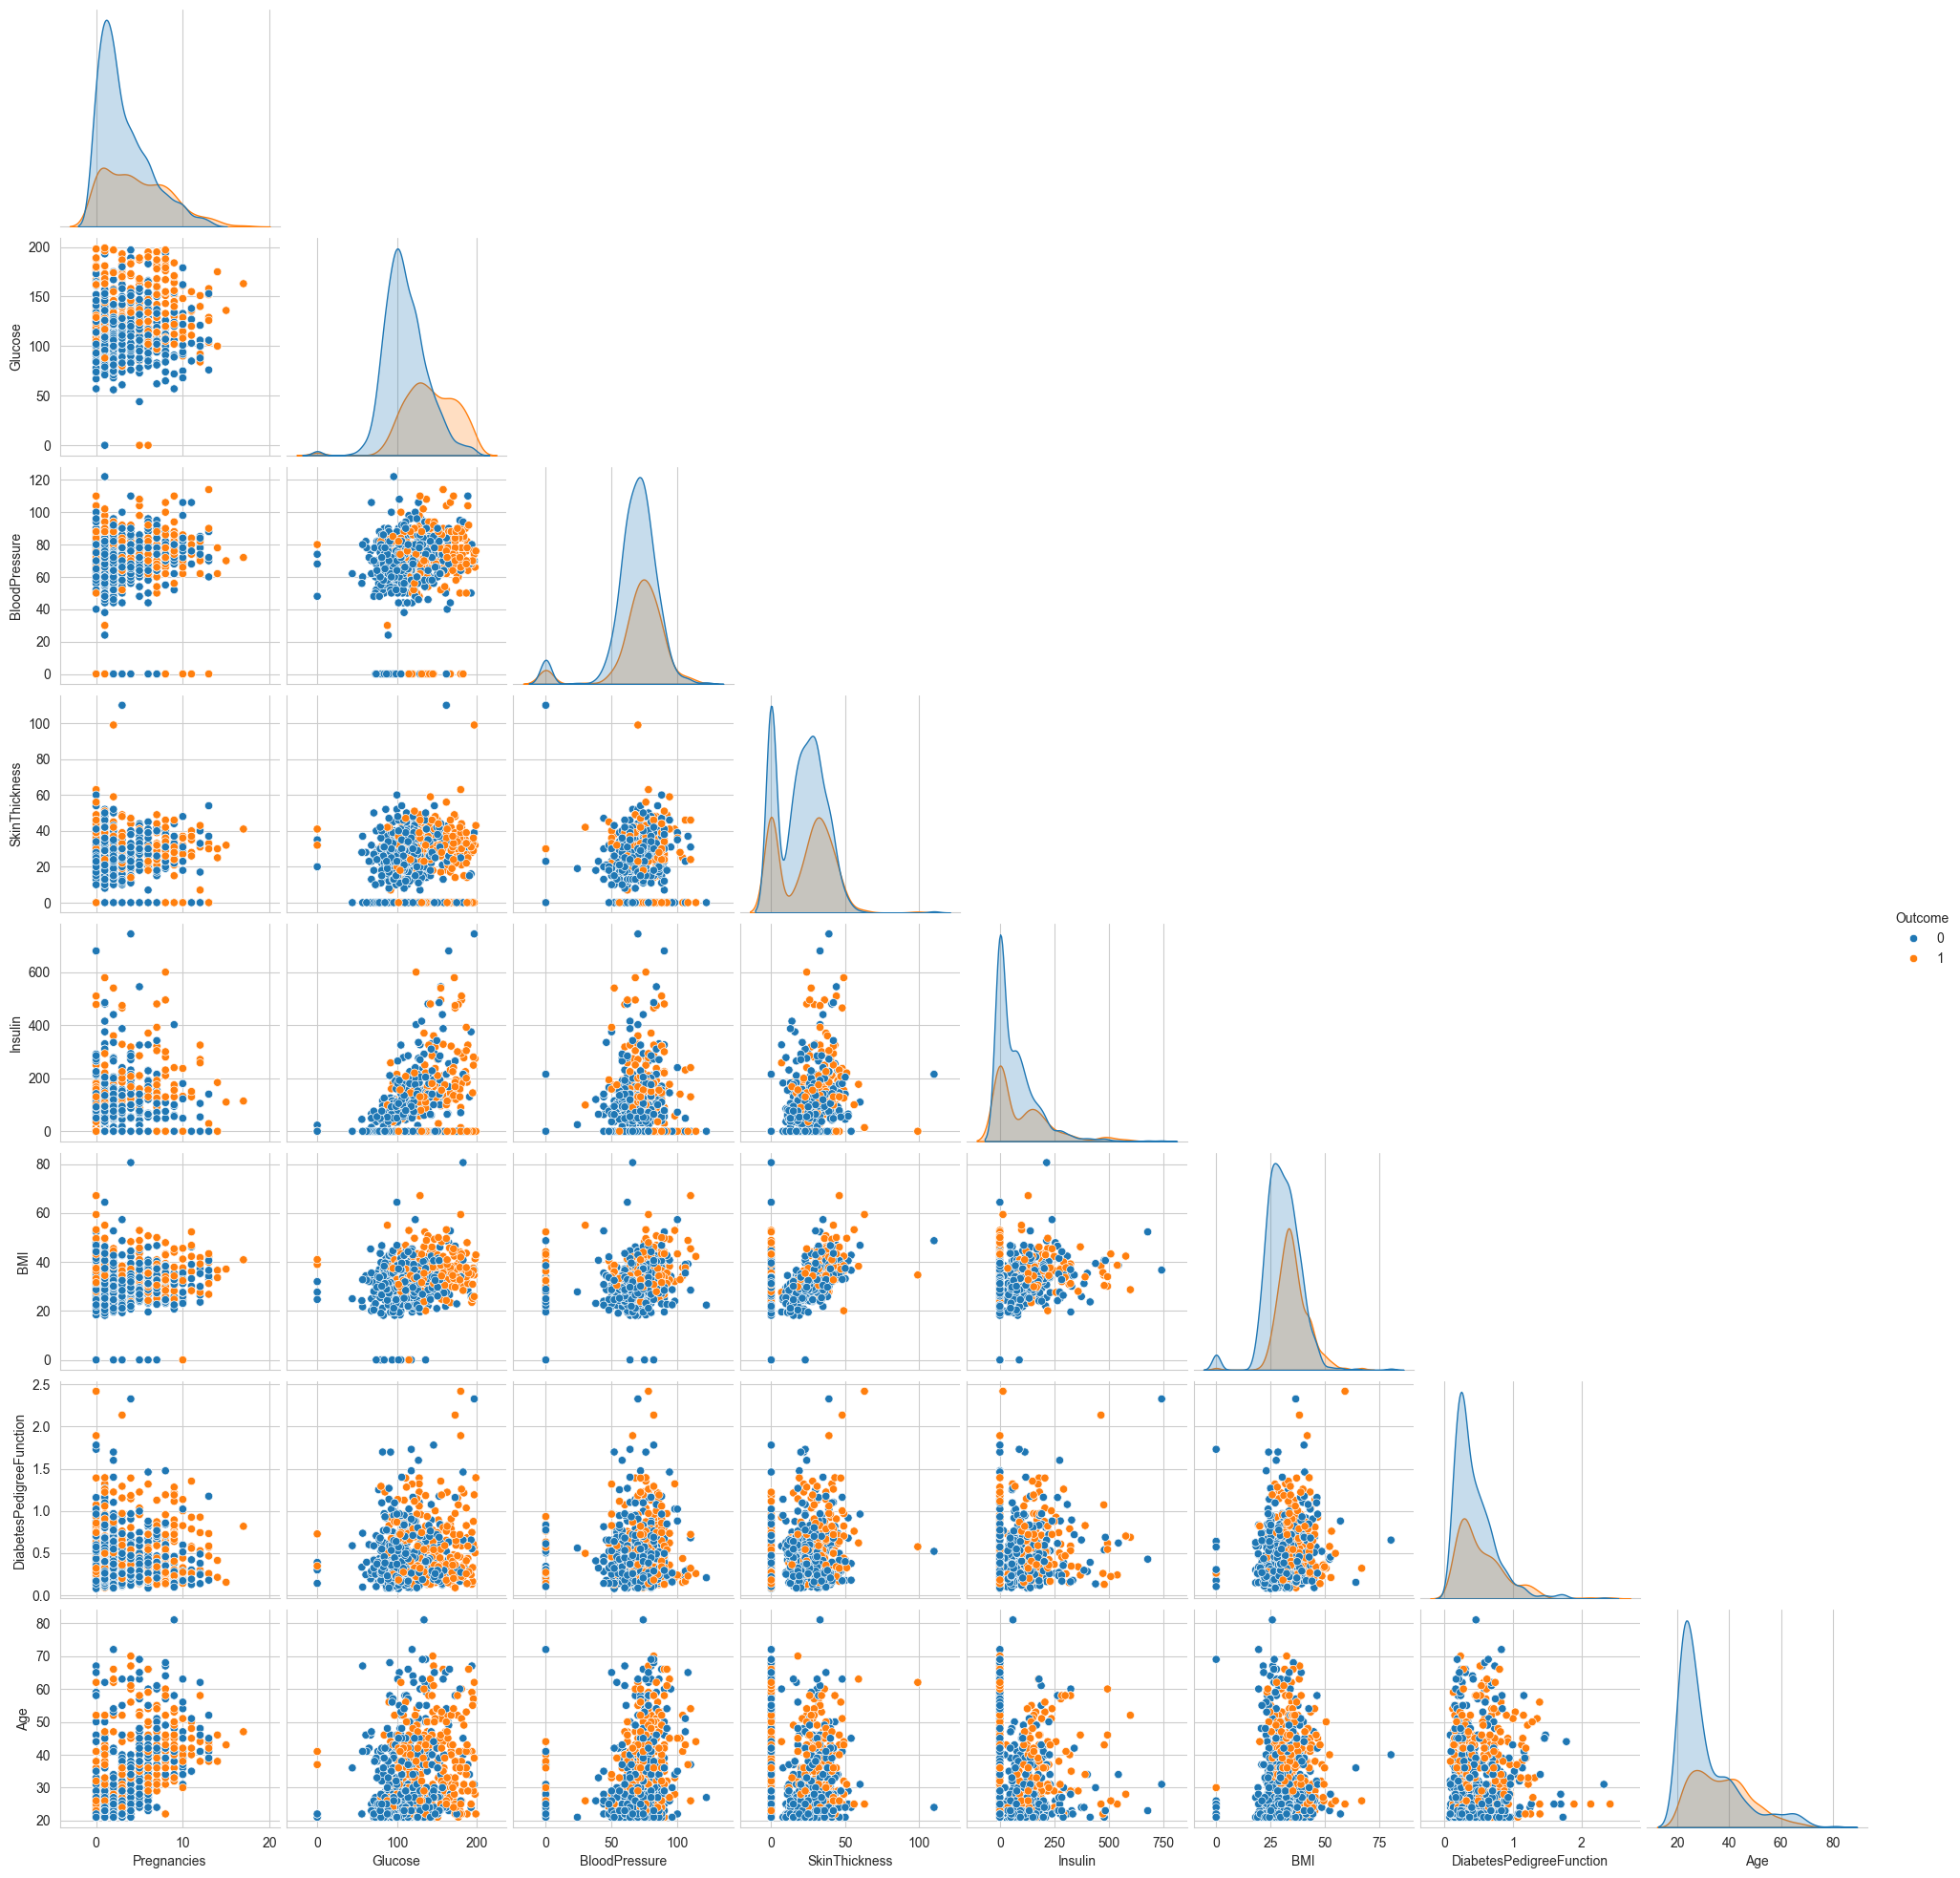

In [473]:
sns.pairplot(df, hue="Outcome", diag_kind="kde", corner=True)
plt.show()

# 2) Data Preprocessing

## 2.1) Missing Observation Analysis

In [476]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [477]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0


In [478]:
df.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [479]:
# Filling the missing values with the median values
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [480]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [481]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,167.0,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,75.0,32.0,167.0,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0
5,0,173.0,78.0,32.0,265.0,46.5,1.159,58,0
6,4,99.0,72.0,17.0,105.0,25.6,0.294,28,0
7,8,194.0,80.0,27.0,105.0,26.1,0.551,67,0
8,2,83.0,65.0,28.0,66.0,36.8,0.629,24,0
9,2,89.0,90.0,30.0,105.0,33.5,0.292,42,0


In [482]:
# Checking
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 2.2) Outlier Observation Analysis

In [484]:
# Checking for outliers
for feature in df:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


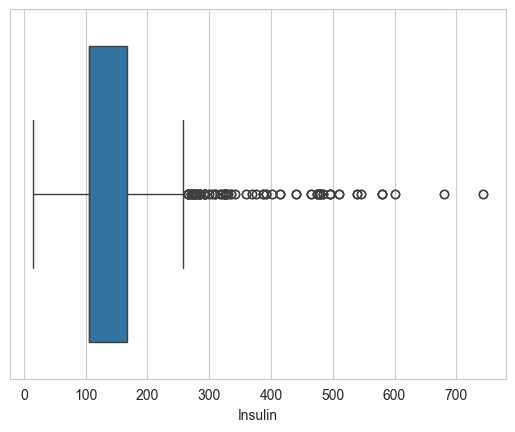

In [485]:
# Visualising outliers of the feature Insulin level
sns.boxplot(x = df["Insulin"]);

In [486]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

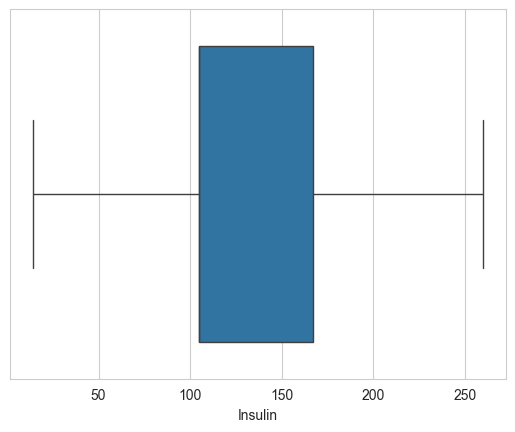

In [487]:
sns.boxplot(x = df["Insulin"]);

## 2.3)  Local Outlier Factor (LOF)

In [489]:
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1, ...,  1, -1,  1])

In [490]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-2.82766102, -2.82766102, -2.49702466, -2.49702466, -2.49702466,
       -2.39201651, -2.39201651, -2.14124487, -2.14124487, -2.00788379,
       -2.00788379, -2.00788379, -1.97049746, -1.97049746, -1.93263345,
       -1.93263345, -1.76919602, -1.76919602, -1.70394288, -1.70394288,
       -1.70394288, -1.64602702, -1.64602702, -1.63263054, -1.63263054,
       -1.62330203, -1.62330203, -1.62330203, -1.61950946, -1.61950946])

In [491]:
#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

-2.1412448748237654

In [492]:
#We delete those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [493]:
# The size of the data set was examined.
df.shape

(1991, 9)

# 3) Feature Engineering

Creating new variables is important for models. For this data set, some new variables were created according to 
* BMI
* Insulin
*  glucose variables.

In [495]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [496]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,2,138.0,62.0,35.0,167.0,33.6,0.127,47,1,Obesity 1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0,Obesity 2
2,0,145.0,75.0,32.0,167.0,44.2,0.630,31,1,Obesity 3
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1,Obesity 3
4,1,139.0,62.0,41.0,260.0,40.7,0.536,21,0,Obesity 3


In [497]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [498]:
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,2,138.0,62.0,35.0,167.0,33.6,0.127,47,1,Obesity 1,Abnormal
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0,Obesity 2,Normal
2,0,145.0,75.0,32.0,167.0,44.2,0.630,31,1,Obesity 3,Abnormal
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1,Obesity 3,Abnormal
4,1,139.0,62.0,41.0,260.0,40.7,0.536,21,0,Obesity 3,Abnormal


In [499]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [500]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,2,138.0,62.0,35.0,167.0,33.6,0.127,47,1,Obesity 1,Abnormal,High
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0,Obesity 2,Normal,Normal
2,0,145.0,75.0,32.0,167.0,44.2,0.630,31,1,Obesity 3,Abnormal,High
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1,Obesity 3,Abnormal,High
4,1,139.0,62.0,41.0,260.0,40.7,0.536,21,0,Obesity 3,Abnormal,High


# 4) One Hot Encoding

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [502]:
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [503]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,2,138.0,62.0,35.0,167.0,33.6,0.127,47,1,True,False,False,False,False,False,False,False,False
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0,False,True,False,False,False,True,False,True,False
2,0,145.0,75.0,32.0,167.0,44.2,0.630,31,1,False,False,True,False,False,False,False,False,False
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1,False,False,True,False,False,False,False,False,False
4,1,139.0,62.0,41.0,260.0,40.7,0.536,21,0,False,False,True,False,False,False,False,False,False


In [504]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight']]

In [505]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,True,False,True,False
2,False,False,True,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False


In [506]:
y = df["Outcome"]
X = df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight'], axis = 1)
cols = X.columns
index = X.index

In [507]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138.0,62.0,35.0,167.0,33.6,0.127,47
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23
2,0,145.0,75.0,32.0,167.0,44.2,0.630,31
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24
4,1,139.0,62.0,41.0,260.0,40.7,0.536,21


In [508]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [509]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.2,0.500000,-0.6250,1.000000,1.000000,0.142857,-0.650000,1.1250
1,-0.6,-0.785714,0.6250,0.428571,0.322581,0.648352,-0.371053,-0.3750
2,-0.6,0.666667,0.1875,0.571429,1.000000,1.307692,0.673684,0.1250
3,-0.6,0.428571,-0.2500,2.000000,2.338710,1.098901,-0.023684,-0.3125
4,-0.4,0.523810,-0.6250,1.857143,2.500000,0.923077,0.426316,-0.5000


In [510]:
X = pd.concat([X,categorical_df], axis = 1)

In [511]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,-0.2,0.500000,-0.6250,1.000000,1.000000,0.142857,-0.650000,1.1250,True,False,False,False,False,False,False,False,False
1,-0.6,-0.785714,0.6250,0.428571,0.322581,0.648352,-0.371053,-0.3750,False,True,False,False,False,True,False,True,False
2,-0.6,0.666667,0.1875,0.571429,1.000000,1.307692,0.673684,0.1250,False,False,True,False,False,False,False,False,False
3,-0.6,0.428571,-0.2500,2.000000,2.338710,1.098901,-0.023684,-0.3125,False,False,True,False,False,False,False,False,False
4,-0.4,0.523810,-0.6250,1.857143,2.500000,0.923077,0.426316,-0.5000,False,False,True,False,False,False,False,False,False


In [512]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

# 5) Base Models

In [514]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [515]:
X_train.shape

(1592, 17)

In [516]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
1913,0.8,-0.857143,0.375,1.714286,-0.919355,1.582418,-0.297368,0.8125,False,False,True,False,False,True,False,True,False
953,-0.6,-0.785714,0.625,0.428571,0.322581,0.648352,-0.371053,-0.3750,False,True,False,False,False,True,False,True,False
1585,-0.2,0.595238,1.375,4.428571,1.161290,0.659341,0.647368,2.1250,False,True,False,False,False,False,False,False,False
1235,-0.6,0.261905,-0.250,-1.285714,1.209677,-0.197802,2.676316,-0.2500,True,False,False,False,False,False,False,False,False
1068,0.0,1.357143,-0.875,-0.857143,1.435484,0.065934,0.576316,0.4375,True,False,False,False,False,False,False,False,False


In [517]:
# Validation scores of all base models
from sklearn.neural_network import MLPClassifier

models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto',C=150, random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(100,), max_iter=700, random_state=12345)))

results = []
names = []

LR: 0.844858 (0.026777)
KNN: 0.878156 (0.019618)
DT: 0.976156 (0.015536)
RF: 0.979285 (0.011227)
SVM: 0.955409 (0.010277)
XGB: 0.952913 (0.023169)
MLP: 0.970487 (0.014050)


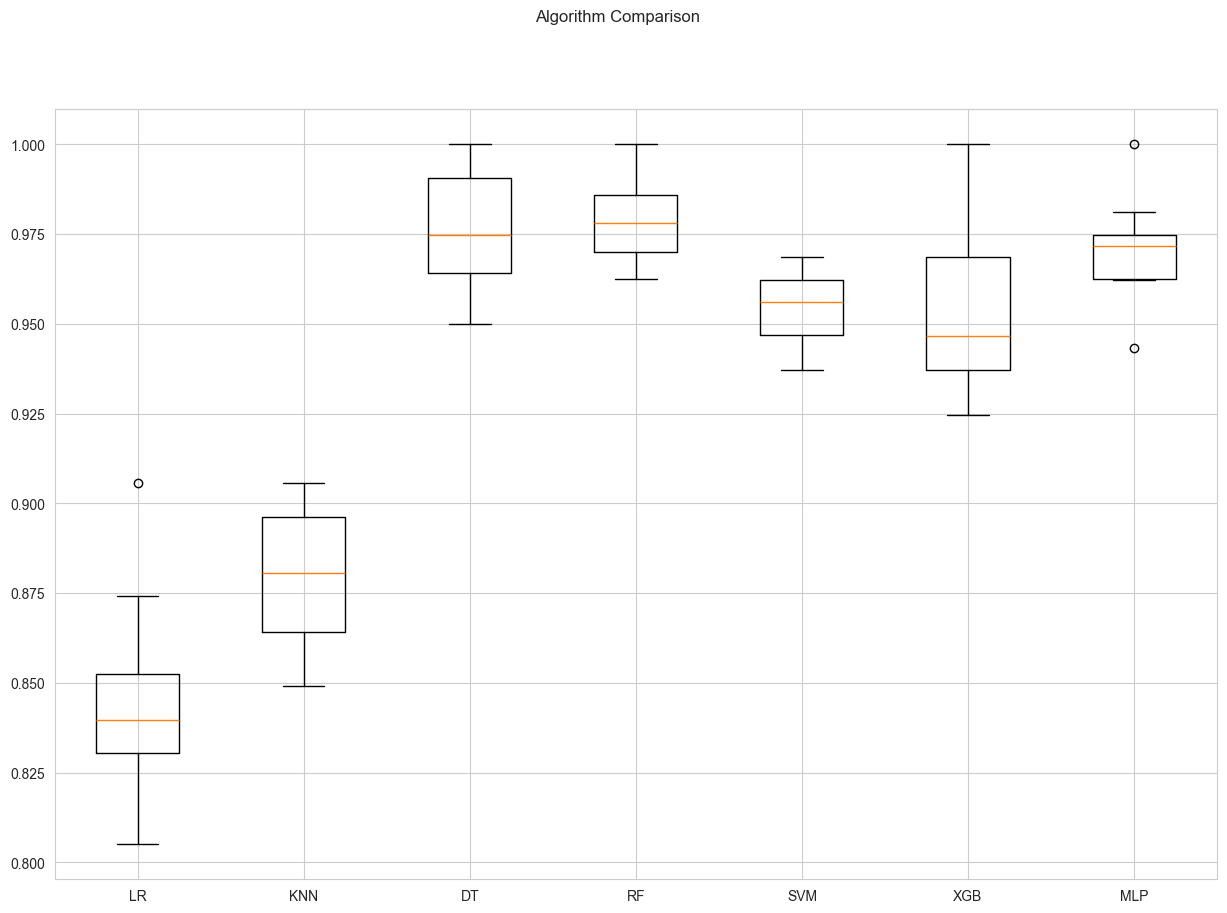

In [518]:
for name, model in models:
    
        kfold = KFold(n_splits=10, shuffle=True, random_state=12345)
        cv_results = cross_val_score(model, X_train, y_train, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

* We got better results in decision tree classifier, random forest classifier, XG boost,SVM and Mlp classifier

# 6) Model Tuning

### 6.1 Support vector machine Tuning

In [522]:
svm_model = SVC(C=100, gamma='auto', kernel='rbf',probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(C=100, gamma='auto', probability=True, random_state=42)

In [523]:
cross_val_score(svm_model, X_train, y_train, cv = 8).mean()

0.9422110552763819

In [524]:
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # For ROC


In [525]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)
# All metrics
acc = accuracy_score(y_test, y_pred_svm)
prec = precision_score(y_test, y_pred_svm)
rec = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print(f"✅ Accuracy:  {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall:    {rec:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))



✅ Accuracy:  0.9724
✅ Precision: 0.9776
✅ Recall:    0.9424
✅ F1 Score:  0.9597

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       260
           1       0.98      0.94      0.96       139

    accuracy                           0.97       399
   macro avg       0.97      0.97      0.97       399
weighted avg       0.97      0.97      0.97       399



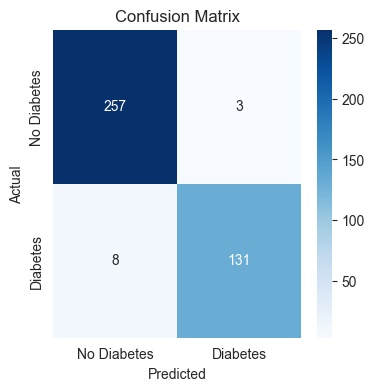

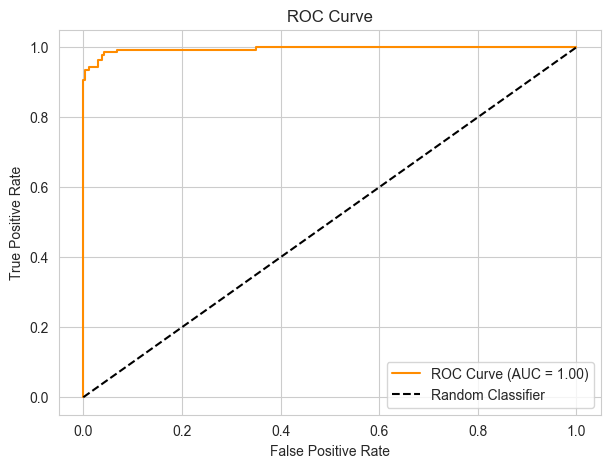

In [526]:
#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#  ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

### 6.2 Random Forest Model Tuning

In [528]:
rf_model = RandomForestClassifier(random_state = 12345)

In [529]:
rf_params = {"n_estimators" :[100,200,500,800], 
             "max_features": [5,7], 
             "min_samples_split": [2,5,10],
            "max_depth": [5,8]}

In [530]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


In [531]:
gs_cv.best_params_

{'max_depth': 8,
 'max_features': 7,
 'min_samples_split': 2,
 'n_estimators': 800}

In [532]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)

In [533]:
rf_tuned = rf_tuned.fit(X_train,y_train)

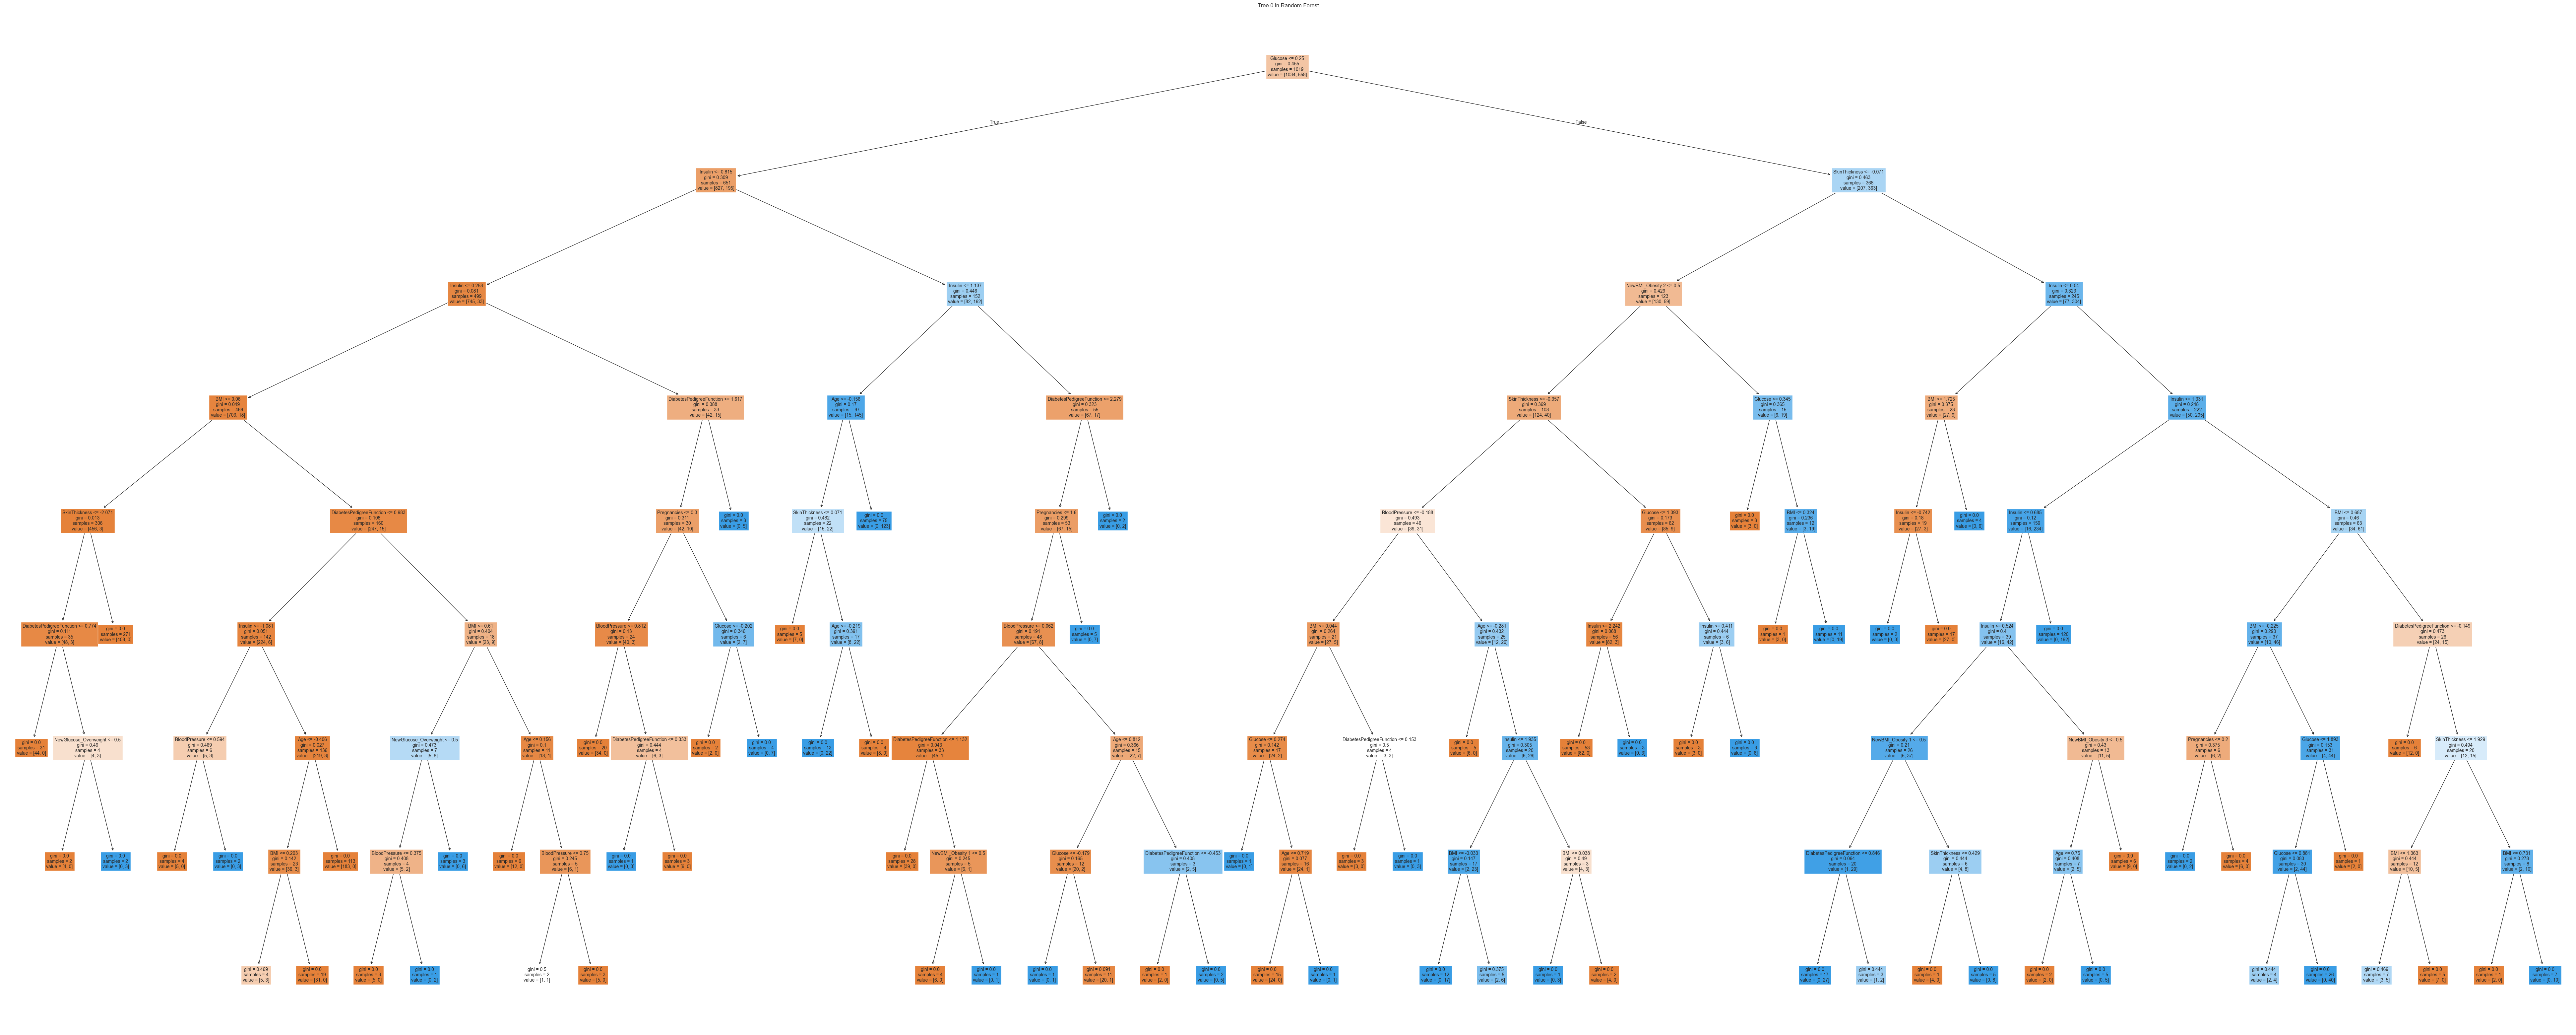

In [534]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

estimator = rf_tuned.estimators_[0]
plt.figure(figsize=(100, 40))
plot_tree(estimator, feature_names=X.columns, filled=True, fontsize=10)
plt.title("Tree 0 in Random Forest")
plt.show()

In [535]:
cross_val_score(rf_tuned, X_train, y_train, cv = 10).mean()

0.9711163522012578

Random Forest Accuracy: 0.9949874686716792
Confusion Matrix:
 [[259   1]
 [  1 138]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       0.99      0.99      0.99       139

    accuracy                           0.99       399
   macro avg       0.99      0.99      0.99       399
weighted avg       0.99      0.99      0.99       399

ROC AUC Score: 0.9998893193137798


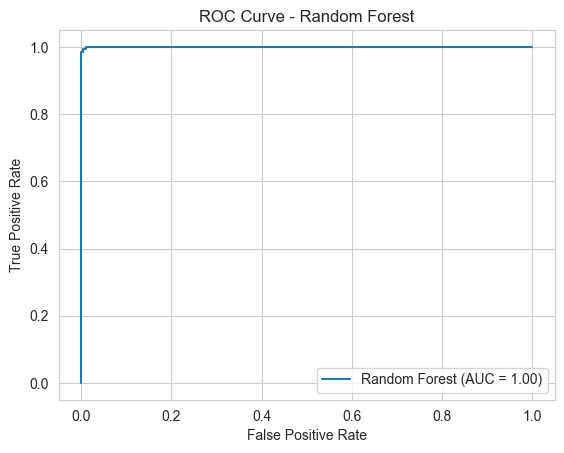

In [536]:
# Predict on the test set
rf_pred = rf_tuned.predict(X_test)
rf_pred_proba = rf_tuned.predict_proba(X_test)[:, 1]  

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:\n", rf_cm)
# Classification Report
rf_cr = classification_report(y_test, rf_pred)
print("Classification Report:\n", rf_cr)
# ROC AUC Score
rf_auc = roc_auc_score(y_test, rf_pred_proba)
print("ROC AUC Score:", rf_auc)

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(rf_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()

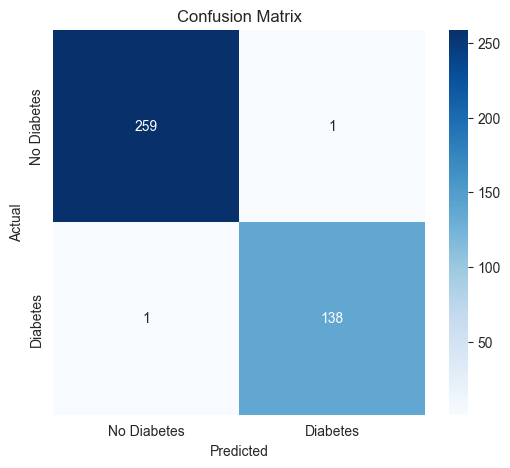

In [537]:
#  Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


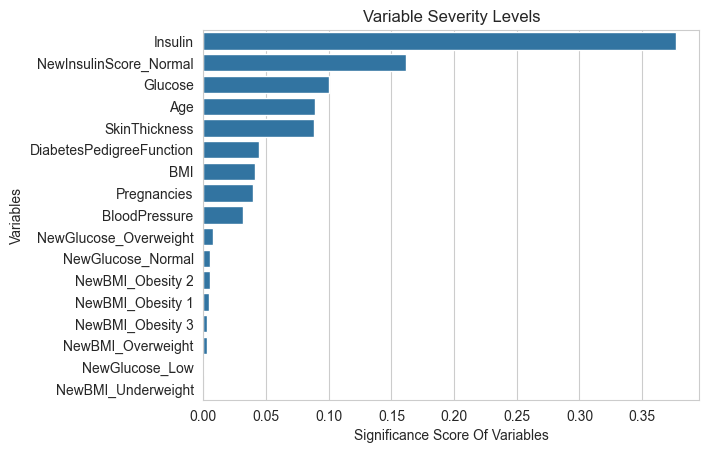

In [538]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

### 6.3 XGBoost Tuning

In [540]:
xgb = GradientBoostingClassifier(random_state = 12345)

In [541]:
xgb_params = {
    "learning_rate": [0.01, 0.1,],
    "min_samples_split": np.linspace(0.1, 0.5),
    "max_depth":[3,5,8],
    "subsample":[1.0],
    "n_estimators": [100,200]}

In [542]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits


In [543]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_samples_split': 0.14081632653061227,
 'n_estimators': 200,
 'subsample': 1.0}

In [544]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X_train,y_train)

In [545]:
cross_val_score(xgb_tuned, X_train, y_train, cv = 10).mean()

0.9817963836477988

XG Boost Accuracy: 1.0
Confusion Matrix:
 [[260   0]
 [  0 139]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      1.00      1.00       139

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399

ROC AUC Score: 1.0


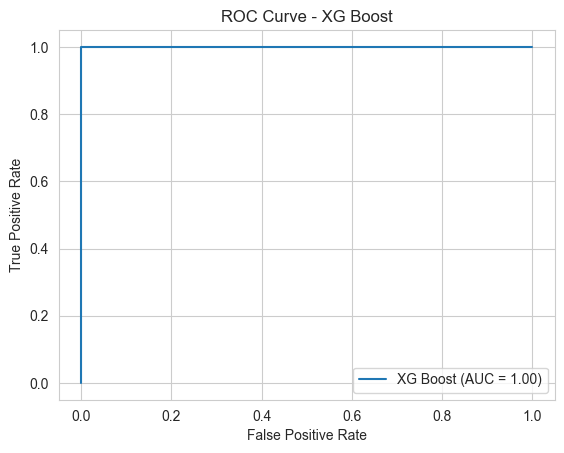

In [546]:
# Predict on the test set
xgb_pred = xgb_tuned.predict(X_test)
xgb_pred_proba = xgb_tuned.predict_proba(X_test)[:, 1]
# Accuracy
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("XG Boost Accuracy:", xgb_accuracy)
# Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_pred)
print("Confusion Matrix:\n", xgb_cm)
# Classification Report
xgb_cr = classification_report(y_test, xgb_pred)
print("Classification Report:\n", xgb_cr)
# ROC AUC Score
xgb_auc = roc_auc_score(y_test, xgb_pred_proba)
print("ROC AUC Score:", xgb_auc)

# ROC Curve 
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_pred_proba)
plt.plot(fpr_xgb, tpr_xgb, label="XG Boost (AUC = {:.2f})".format(xgb_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XG Boost")
plt.legend()
plt.grid(True)
plt.show()

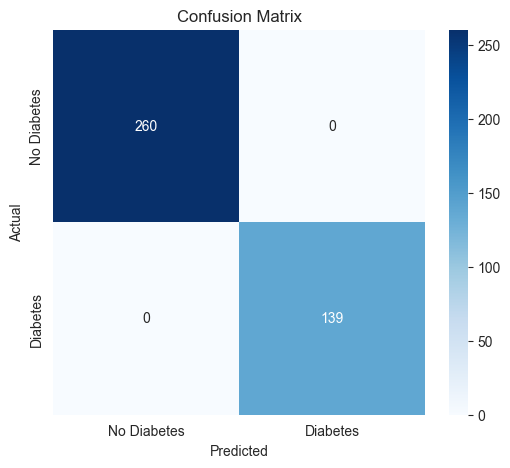

In [547]:
#  Confusion Matrix
cm = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

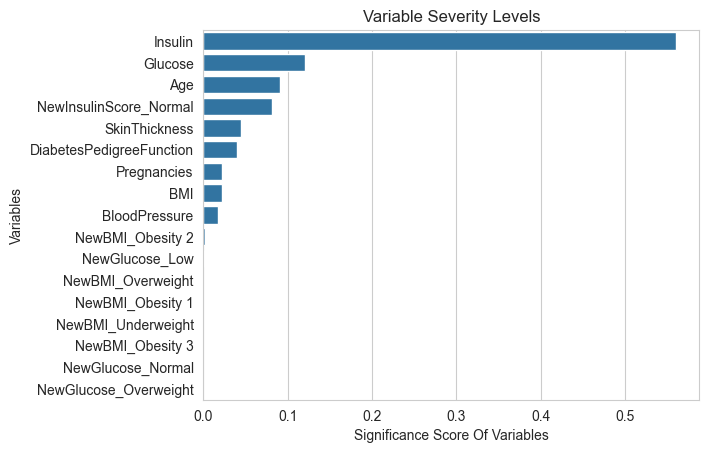

In [548]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

### 6.4 Decision tree Tuning

In [550]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier()
gs_cv = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
gs_cv.fit(X_train, y_train)
print("Best Parameters:", gs_cv.best_params_)
print("Best Cross-Validation Accuracy:", gs_cv.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9717414877466928


In [551]:
dt_tuned = DecisionTreeClassifier(**gs_cv.best_params_)
dt_tuned.fit(X_train, y_train)
y_pred_dt = dt_tuned.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of Tuned Decision Tree: {accuracy}")


Accuracy of Tuned Decision Tree: 0.9949874686716792


Decision Tree Accuracy: 0.9949874686716792
Confusion Matrix:
 [[260   0]
 [  2 137]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       260
           1       1.00      0.99      0.99       139

    accuracy                           0.99       399
   macro avg       1.00      0.99      0.99       399
weighted avg       1.00      0.99      0.99       399

ROC AUC Score: 0.9928057553956835


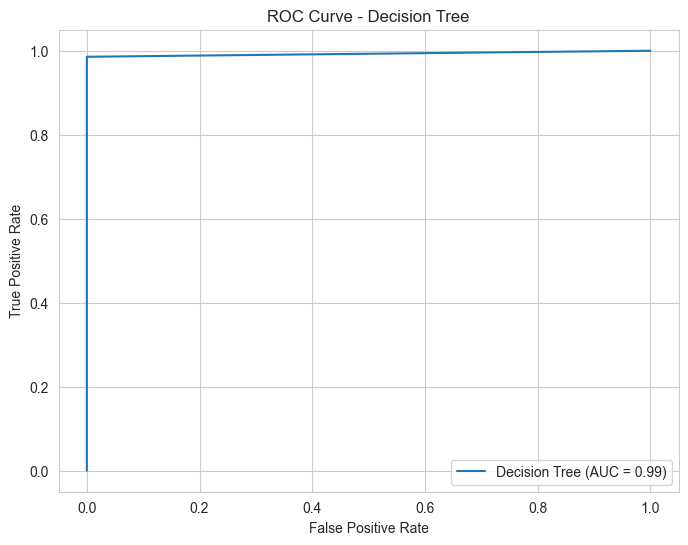

In [552]:
dt_tuned = DecisionTreeClassifier(**gs_cv.best_params_)
dt_tuned.fit(X_train, y_train)
dt_pred = dt_tuned.predict(X_test)
dt_pred_proba = dt_tuned.predict_proba(X_test)[:, 1]
# Accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)
# Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_pred)
print("Confusion Matrix:\n", dt_cm)
# Classification Report
dt_cr = classification_report(y_test, dt_pred)
print("Classification Report:\n", dt_cr)
# ROC AUC Score
dt_auc = roc_auc_score(y_test, dt_pred_proba)
print("ROC AUC Score:", dt_auc)

# ROC Curve 
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label="Decision Tree (AUC = {:.2f})".format(dt_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.grid(True)
plt.show()


### 6.5 ANN Model Tuning

In [554]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_tensor = torch.from_numpy(X.values.astype(np.float32))
y_tensor = torch.from_numpy(y.values.astype(np.float32)).view(-1, 1)
# Train-test split
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X.shape[1], 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(32, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.model(x)

model = ANN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)



In [555]:
model

ANN(
  (model): Sequential(
    (0): Linear(in_features=17, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=32, out_features=1, bias=True)
    (9): Sigmoid()
  )
)

In [556]:

# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_ann)
    loss = criterion(outputs, y_train_ann)
    loss.backward()
    optimizer.step()
    scheduler.step()

    if (epoch+1) % 10 == 0:
        model.eval()
        with torch.no_grad():
            preds = model(X_test_ann)
            preds_cls = (preds > 0.5).float()
            acc = accuracy_score(y_test_ann, preds_cls)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")

Epoch 10/500, Loss: 0.5731, Accuracy: 0.7143
Epoch 20/500, Loss: 0.5340, Accuracy: 0.8145
Epoch 30/500, Loss: 0.5168, Accuracy: 0.8221
Epoch 40/500, Loss: 0.5108, Accuracy: 0.8195
Epoch 50/500, Loss: 0.5080, Accuracy: 0.8170
Epoch 60/500, Loss: 0.5053, Accuracy: 0.8221
Epoch 70/500, Loss: 0.5071, Accuracy: 0.8221
Epoch 80/500, Loss: 0.5026, Accuracy: 0.8221
Epoch 90/500, Loss: 0.5016, Accuracy: 0.8221
Epoch 100/500, Loss: 0.5019, Accuracy: 0.8221
Epoch 110/500, Loss: 0.5020, Accuracy: 0.8221
Epoch 120/500, Loss: 0.4938, Accuracy: 0.8221
Epoch 130/500, Loss: 0.4971, Accuracy: 0.8221
Epoch 140/500, Loss: 0.5067, Accuracy: 0.8221
Epoch 150/500, Loss: 0.4979, Accuracy: 0.8221
Epoch 160/500, Loss: 0.5022, Accuracy: 0.8221
Epoch 170/500, Loss: 0.5013, Accuracy: 0.8221
Epoch 180/500, Loss: 0.5039, Accuracy: 0.8221
Epoch 190/500, Loss: 0.5027, Accuracy: 0.8221
Epoch 200/500, Loss: 0.4999, Accuracy: 0.8221
Epoch 210/500, Loss: 0.5078, Accuracy: 0.8221
Epoch 220/500, Loss: 0.4999, Accuracy: 0.82

In [557]:
# Evaluate
model.eval()
with torch.no_grad():
    y_pred = model(X_test_ann)
    y_pred_class = (y_pred > 0.5).float()
    acc = accuracy_score(y_test_ann, y_pred_class)
    print(f"\n✅ Accuracy on Test Set: {acc:.4f}")


✅ Accuracy on Test Set: 0.8221


In [558]:

# Confusion Matrix
ann_cm = confusion_matrix(y_test_ann, y_pred_class)
print("Confusion Matrix:\n", ann_cm)

# Classification Report
ann_cr = classification_report(y_test_ann, y_pred_class)
print("Classification Report:\n", ann_cr)


Confusion Matrix:
 [[229  40]
 [ 31  99]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       269
         1.0       0.71      0.76      0.74       130

    accuracy                           0.82       399
   macro avg       0.80      0.81      0.80       399
weighted avg       0.83      0.82      0.82       399



# 7) Comparison of Final Models

In [560]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 2, n_estimators = 800)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.1, max_depth = 8, min_samples_split = 0.1, n_estimators = 200, subsample = 1.0)))
models.append(('SVM', SVC(C=500, gamma=0.01, kernel='rbf',probability=True, random_state=42)))
models.append(('DT', DecisionTreeClassifier(criterion='gini', max_depth= None, min_samples_leaf= 1, min_samples_split= 2)))
# evaluate each model 
results = []
names = []

In [561]:
for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        

RF: 0.971116 (0.012919)
XGB: 0.979285 (0.008870)
SVM: 0.912087 (0.019111)
DT: 0.974269 (0.013832)


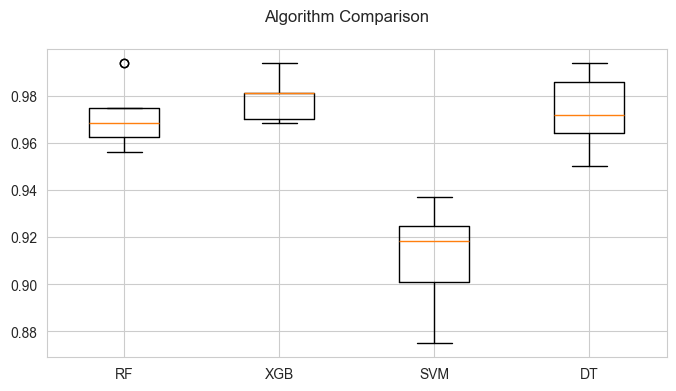

In [562]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(8,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 8) Conclusion

Logistic Regression, KNN, SVM, decision tree, Random Forests, XGBoost,ANN like using machine learning models Cross Validation Score were calculated. Later Random Forests, XGBoost, SVM, ANN hyperparameter optimizations optimized to increase Cross Validation value.
***
The model created as a result of XGBoost hyperparameter optimization became the model with the highest Cross Validation Score value. (0.97)